In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

: 

: 

In [2]:
df = pd.read_csv('dataset/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
columns = ['gender', 'race/ethnicity', 'parental level of education',	'lunch', 'test preparation course',	'math score'	,'reading score', 'writing score']

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
cat_columns = ['gender', 'race/ethnicity', 'parental level of education',	'lunch', 'test preparation course'	]
for col in cat_columns:
    print("categories in "+ col + " variable: ", end=" " )
    print(df[col].unique())

categories in gender variable:  ['female' 'male']
categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:  ['standard' 'free/reduced']
categories in test preparation course variable:  ['none' 'completed']


In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features {}'.format(len(numerical_features), numerical_features))
print('\nwe have {} categorical features {}'.format(len(cat_features), cat_features))

we have 3 numerical features ['math score', 'reading score', 'writing score']

we have 5 categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
#add total score and average score
df['total score'] = df['math score']+ df['reading score']+ df['writing score']
df['average score'] =df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
#NO of students with full scores
reading_full =df [df['reading score'] == 100]['average score'].count()
writing_full =df [df['writing score'] == 100]['average score'].count()
math_full =df [df['math score'] == 100]['average score'].count()

print("No of students that have full score in READING {}".format(reading_full))
print("No of students that have full score in WRITING {}".format(writing_full))
print("No of students that have full score in MATH {}".format(math_full))

No of students that have full score in READING 17
No of students that have full score in WRITING 14
No of students that have full score in MATH 7


In [17]:
#NO of students with scores less than 20
reading_less =df [df['reading score'] <= 20]['average score'].count()
writing_less =df [df['writing score'] <= 20]['average score'].count()
math_less =df [df['math score'] <= 20]['average score'].count()

print("No of students that have score less than 20 in READING {}".format(reading_less))
print("No of students that have score less than 20 in WRITING {}".format(writing_less))
print("No of students that have score less than 20  in MATH {}".format(math_less))

No of students that have score less than 20 in READING 1
No of students that have score less than 20 in WRITING 3
No of students that have score less than 20  in MATH 4


<h2>visualizations</h2>

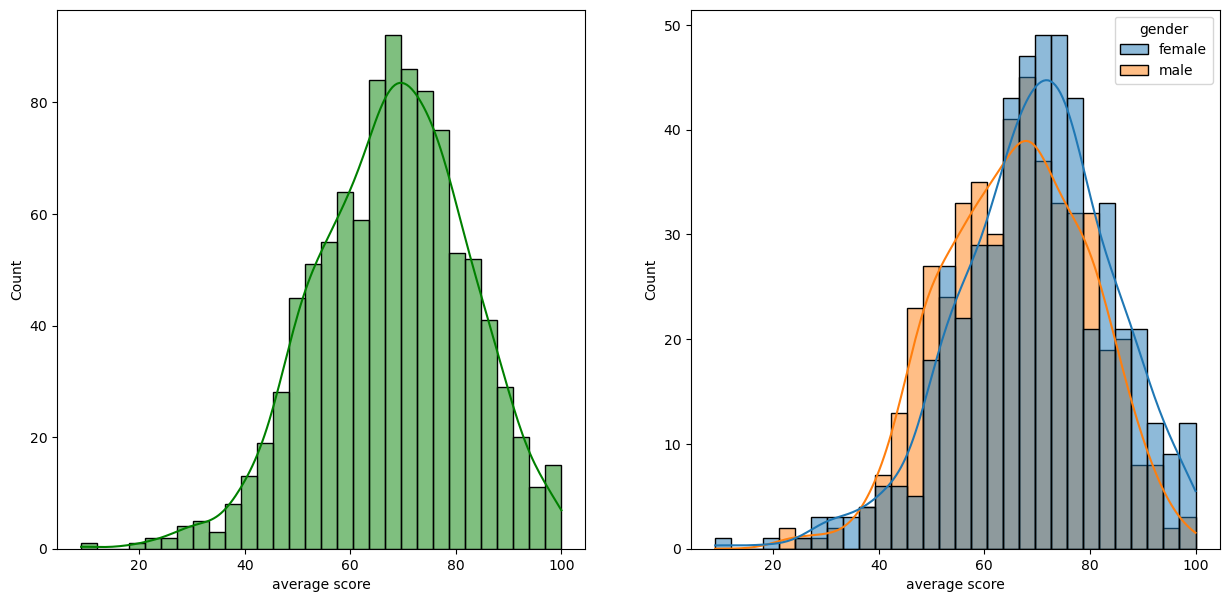

In [21]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', bins=30,kde=True, hue='gender')
plt.show()

<h2>Insight</h2>
<p>Female students tends to perform better</p>

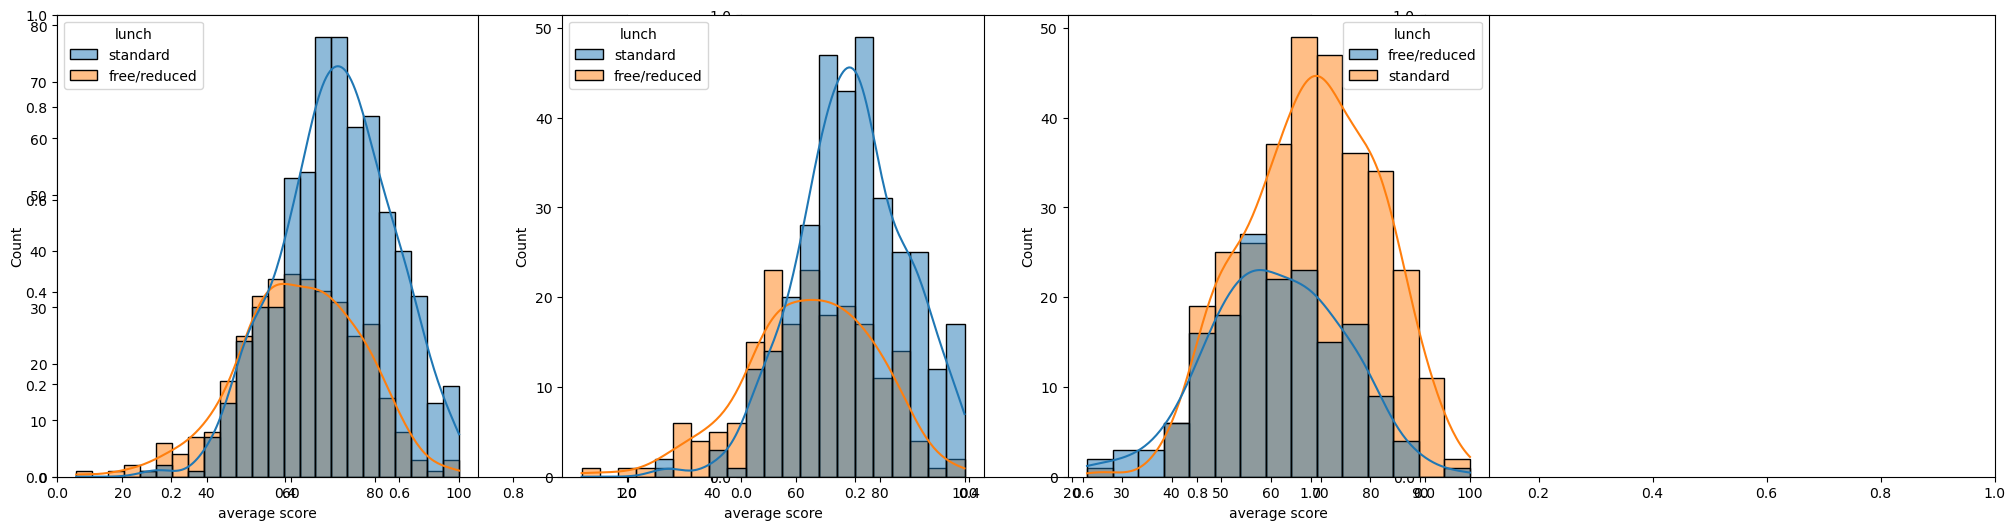

In [27]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score', hue='lunch', kde=True )
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='lunch')
plt.show()

<h2>Insight</h2>
<p>Students wit Standard lunch tends to perform better</p>

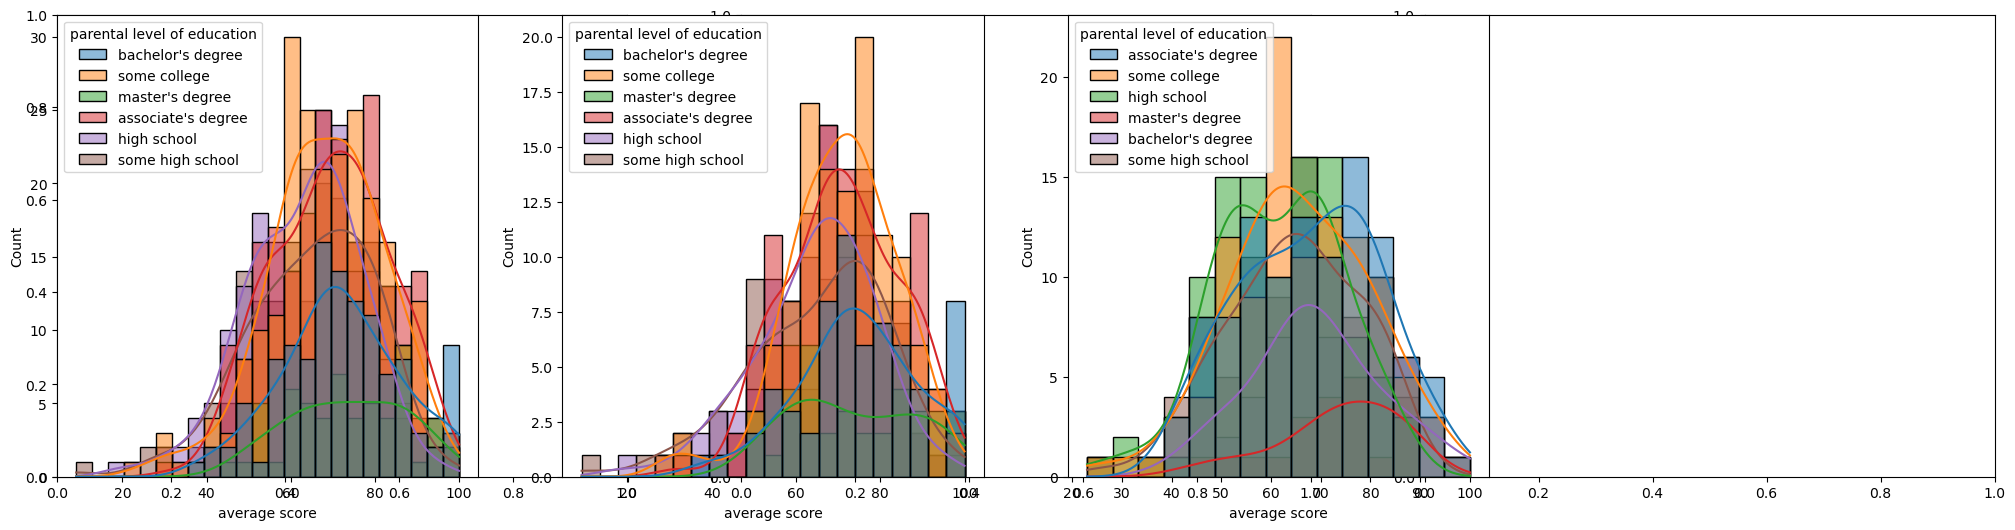

In [29]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score', hue='parental level of education', kde=True )
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average score', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average score', kde=True, hue='parental level of education')
plt.show()